In [25]:
import matplotlib.pyplot as plt
import numpy as np
import timeit

import pandas as pd

from src.PricingMethod import PricingMonteCarlo
from src.Derivative import EuropeanCall
from src.UnderlyingModel import BlackScholes

In [32]:
r = 0.02
q = 0.1
sigma = 0.4
S = 100 


n_time = 10000
n_mc = 1000
mc_pricer = PricingMonteCarlo(n_time, n_mc)


dic_param_call = {
    'K' : 100,
    'end_time' : 1,
    'valuation_time' : 0
}
european_call = EuropeanCall(dic_param_call) 
bs_model = BlackScholes(r,q,sigma,S, {})

t = np.linspace(dic_param_call['valuation_time'],dic_param_call['end_time'],n_time+1)

In [33]:
print(bs_model)

model_name : Black Scholes model
r : 0.02
q : 0.1
sigma : 0.4
underlying_price : 100



In [34]:
paths = mc_pricer.generate_paths(european_call,bs_model)

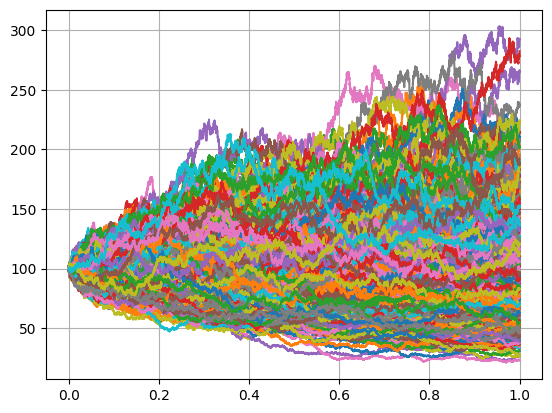

In [35]:
for k in range(paths.shape[0]):
    plt.plot(t, paths[k,:])
plt.grid()
plt.show()

In [36]:
num_runs = 1000
num_executions_per_run = 1  # Number of executions per run to capture more accurate stats
execution_time = np.array(timeit.repeat("mc_pricer.generate_paths(european_call,bs_model)", repeat = num_runs, number = num_executions_per_run,globals=globals()))

In [37]:
pd.DataFrame(execution_time).describe()

,0
count,1000.000000
mean,0.260735
std,0.013614
min,0.250745
25%,0.256329
50%,0.258551
75%,0.261106
max,0.425619
